## Logistic Regression for Imbalanced Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
# creation of dataset
from sklearn.datasets import make_classification
from collections import Counter

x, y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [13]:
x[1]

array([ 0.37708311, -2.23858488])

In [8]:
y

array([0, 0, 0, ..., 0, 0, 0], shape=(10000,))

In [9]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [10]:
import seaborn as sns

<Axes: >

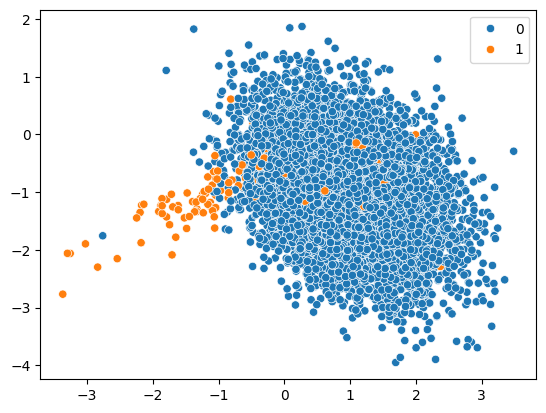

In [15]:
import pandas as pd

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)

In [16]:
# train test split

from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [63]:
# hyper parameter tuning

from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100, 10, 1.0, 0.1, 0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [65]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [66]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [68]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv)

In [69]:
grid.fit(x_train, y_train)

d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DS, ML, DL, NLP\Machine Lea

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [70]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [71]:
grid.best_score_

np.float64(0.9881333333333334)

In [72]:
y_pred = grid.predict(x_test)

In [73]:
# performace metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(score)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
print(classification_report(y_true=y_test, y_pred=y_pred))

0.992
[[2468    2]
 [  18   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500

